In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [4]:
train_df = pd.read_csv('data/prices_train.csv')
test_df = pd.read_csv('data/prices_test.csv')

In [5]:
print(train_df.head())
print(train_df.info())

   Unnamed: 0  X1 transaction date  X2 house age  \
0           0             2013.083          34.0   
1           1             2013.500          13.3   
2           2             2012.917          13.7   
3           3             2013.500           8.5   
4           4             2013.500          13.2   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                157.6052                              7.0   
1                                561.9845                              5.0   
2                               1236.5640                              1.0   
3                                104.8101                              5.0   
4                               1164.8380                              NaN   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.96628     121.54196                        39.1  
1     24.98746     121.54391                        54.8  
2     24.97694     121.55391             

In [7]:
X_train = train_df.drop(columns=['Y house price of unit area'])
y_train = train_df['Y house price of unit area']
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(test_df), columns=X_train.columns)

In [8]:
model = LinearRegression()
model.fit(X_train_imputed, y_train)

LinearRegression()

In [9]:
y_pred_test = model.predict(X_test_imputed)
print(y_pred_test[:5])

[38.97717301 34.20764759 38.28183435 32.31420478 37.83004304]


                                  Feature  Coefficient
5                             X5 latitude   225.210442
6                            X6 longitude    10.160030
1                     X1 transaction date     6.058373
4         X4 number of convenience stores     1.075515
2                            X2 house age    -0.301515
0                              Unnamed: 0    -0.004625
3  X3 distance to the nearest MRT station    -0.004178


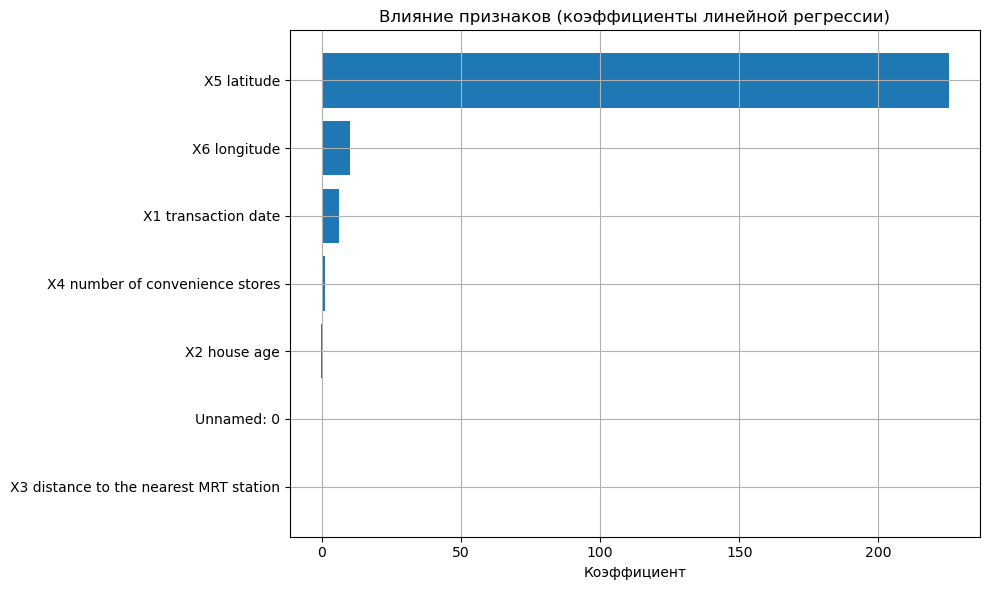

In [10]:
import matplotlib.pyplot as plt
coefficients = model.coef_
features = X_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Coefficient'])
plt.gca().invert_yaxis()
plt.title('Влияние признаков (коэффициенты линейной регрессии)')
plt.xlabel('Коэффициент')
plt.grid(True)
plt.tight_layout()
plt.show()

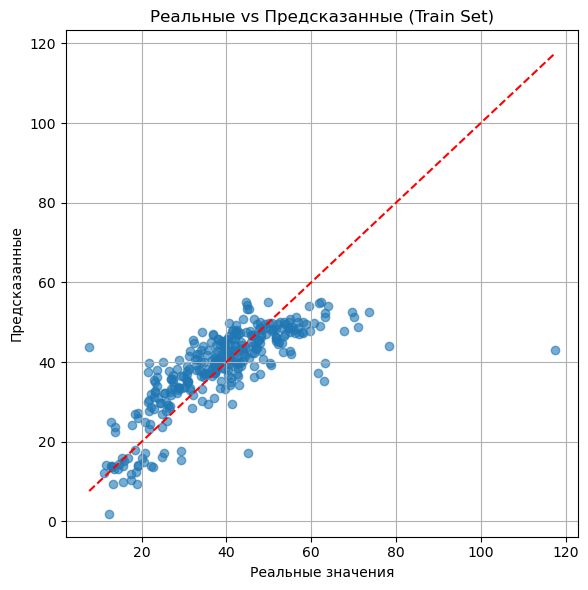

In [11]:
y_train_pred = model.predict(X_train_imputed)
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные')
plt.title('Реальные vs Предсказанные (Train Set)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, y_train_pred)
rmse = mse ** 0.5

print(f'MSE (Train): {mse:.2f}')
print(f'RMSE (Train): {rmse:.2f}')

MSE (Train): 77.80
RMSE (Train): 8.82


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
X_train = train_df.drop(columns=['Y house price of unit area'])
y_train = train_df['Y house price of unit area']

feature_cols = X_train.columns.tolist()

X_train = X_train.copy()
test_df = test_df.copy()

X_train['log_distance'] = np.log1p(X_train['X3 distance to the nearest MRT station'])
test_df['log_distance'] = np.log1p(test_df['X3 distance to the nearest MRT station'])
X_train['age_dist'] = X_train['X2 house age'] * X_train['X3 distance to the nearest MRT station']
test_df['age_dist'] = test_df['X2 house age'] * test_df['X3 distance to the nearest MRT station']

In [ ]:
features_extended = X_train.columns

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, features_extended)
])


In [ ]:
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model_pipeline.fit(X_train, y_train)


In [ ]:
y_train_pred = model_pipeline.predict(X_train)

# MSE / RMSE
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
print(f'MSE (Train): {mse:.2f}')
print(f'RMSE (Train): {rmse:.2f}')


In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_train_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные')
plt.title('Реальные vs Предсказанные (улучшенная модель)')
plt.grid(True)
plt.tight_layout()
plt.show()